<a href="https://colab.research.google.com/github/kln-se/data-analysis/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%A1%D0%92%D0%98_%D0%92%D0%9B_220_%D0%BA%D0%92_%D0%90_%D0%93%D0%9A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Доступ к диску
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os
import glob
import numpy as np

In [ ]:
# Список имен файлов
os.listdir('/content/drive/MyDrive/Colab Notebooks/Работа/out')

In [ ]:
# Список имен файлов
l = os.listdir('/content/drive/MyDrive/Colab Notebooks/Работа/out')
print(len(l))

5602


In [ ]:
# Путь к папке с файлами
path =r'/content/drive/MyDrive/Colab Notebooks/Работа/out/'

# Создадим список c путями к каждому файлу
file_pathes = glob.glob(path + '*.csv')

# Список, который будет хранить считанную информацию из каждого файла
dfs = []


# Считываем
for idx,file_path in enumerate(file_pathes):
    print(idx)
    dfs.append(pd.read_csv(file_path))

# Объединяем все df
complete_df = pd.concat(dfs[:10], ignore_index=True)

In [ ]:
# Сохраним получившийся df в файл
complete_df.to_csv(path_or_buf = '/content/drive/MyDrive/Colab Notebooks/Работа/out/pmu_data.csv')

In [ ]:
data = pd.read_csv(filepath_or_buffer = '/content/drive/MyDrive/Colab Notebooks/Работа/out/pmu_data.csv')

In [ ]:
cdata = data.copy()

In [ ]:
# ВЛ 220 кВ А - ГК: idcode = 3170
agk = cdata[ cdata['IDCODE'] == 3170 ]
# Удаляем лишний столбец
agk.drop(columns = ['Unnamed: 0'], inplace = True)
# Удаляем лишние пробелы в метках
agk['ChannelName'] = agk['ChannelName'].apply(lambda x: x.strip())
# Подредактируем метку времени
agk['DateTime'] = agk['DateTime'].apply(lambda x: x[0:-3])
# Уберем скобки, выделим амплитуду и фазу
agk['Phasors'] = agk['Phasors'].apply(lambda x: x[1:-1].split(','))
# Переведем фазу в градусы и округлим, округлим амплитуду
#agk['Phasors'] = agk['Phasors'].apply(lambda x: [round(float(x[0]), 2), round(float(x[1])*180/np.pi, 3)])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [ ]:
agk

,DateTime,ChannelName,Phasors,IDCODE
0,2021-06-11T16:56:42.0,Uphs_a,"[130658.0, -0.0064235446]",3170
1,2021-06-11T16:56:42.0,Uphs_b,"[131406.0, -2.0985816]",3170
2,2021-06-11T16:56:42.0,Uphs_c,"[130966.0, 2.0843923]",3170
3,2021-06-11T16:56:42.0,Iphs_a,"[16.1, -1.2942004]",3170
4,2021-06-11T16:56:42.0,Iphs_b,"[11.6, 3.0922177]",3170
...,...,...,...,...
16142215,2021-06-14T14:14:56.0,U1,"[129734.0, 2.2208207]",3170
16142216,2021-06-14T14:14:56.0,U2,"[550.0, -1.8281215]",3170
16142217,2021-06-14T14:14:56.0,I0,"[0.6, 0.35943088]",3170
16142218,2021-06-14T14:14:56.0,I1,"[152.1, -0.67207533]",3170


In [ ]:
cagk = agk.drop_duplicates(subset=['DateTime','ChannelName'])

In [ ]:
cagk

,DateTime,ChannelName,Phasors,IDCODE
0,2021-06-11T16:56:42.0,Uphs_a,"[130658.0, -0.0064235446]",3170
1,2021-06-11T16:56:42.0,Uphs_b,"[131406.0, -2.0985816]",3170
2,2021-06-11T16:56:42.0,Uphs_c,"[130966.0, 2.0843923]",3170
3,2021-06-11T16:56:42.0,Iphs_a,"[16.1, -1.2942004]",3170
4,2021-06-11T16:56:42.0,Iphs_b,"[11.6, 3.0922177]",3170
...,...,...,...,...
16142215,2021-06-14T14:14:56.0,U1,"[129734.0, 2.2208207]",3170
16142216,2021-06-14T14:14:56.0,U2,"[550.0, -1.8281215]",3170
16142217,2021-06-14T14:14:56.0,I0,"[0.6, 0.35943088]",3170
16142218,2021-06-14T14:14:56.0,I1,"[152.1, -0.67207533]",3170


In [ ]:
cagk['ChannelName'].unique()

array(['Uphs_a', 'Uphs_b', 'Uphs_c', 'Iphs_a', 'Iphs_b', 'Iphs_c', 'U0',
       'U1', 'U2', 'I0', 'I1', 'I2'], dtype=object)

In [ ]:
pagk = cagk.pivot(index='DateTime', columns='ChannelName', values='Phasors')

In [ ]:
pagk.astype('O')

ChannelName,I0,I1,I2,Iphs_a,Iphs_b,Iphs_c,U0,U1,U2,Uphs_a,Uphs_b,Uphs_c
DateTime,,,,,,,,,,,,
2021-06-10T16:59:51.8,"[0.3, 1.6222806]","[81.3, 1.7585173]","[7.2000003, 2.8639421]","[85.200005, 1.833874]","[85.4, -0.40276584]","[73.9, -2.4398923]","[66.0, -3.0641265]","[131648.0, -1.9061629]","[440.0, 0.10095511]","[131494.0, -1.9036702]","[132132.0, 2.282851]","[131296.0, 0.1855158]"
2021-06-10T16:59:52.0,"[0.3, 1.5993667]","[80.4, 1.7470124]","[7.2000003, 2.844192]","[84.3, 1.8225609]","[84.4, -0.4152294]","[73.0, -2.450726]","[66.0, -3.0832055]","[131692.0, -1.9271592]","[418.0, 0.07439807]","[131538.0, -1.9246665]","[132176.0, 2.2617588]","[131362.0, 0.16461532]"
2021-06-10T16:59:53.0,"[0.3, 1.4898788]","[80.200005, 1.6336895]","[7.1, 2.7245417]","[84.1, 1.7088546]","[84.1, -0.52855223]","[72.8, -2.5634737]","[66.0, 3.0810962]","[131626.0, -2.0408657]","[418.0, -0.036911413]","[131472.0, -2.0384686]","[132110.0, 2.1480525]","[131296.0, 0.050813112]"
2021-06-10T16:59:54.0,"[0.3, 1.3647635]","[81.4, 1.5164359]","[7.0, 2.607959]","[85.200005, 1.5894917]","[85.200005, -0.64379257]","[74.0, -2.6806314]","[66.0, 2.9882903]","[131648.0, -2.155243]","[440.0, -0.12175973]","[131494.0, -2.1527503]","[132132.0, 2.0338666]","[131318.0, -0.06356433]"
2021-06-10T16:59:55.0,"[0.3, 1.2199941]","[81.700005, 1.3862393]","[7.1, 2.4747903]","[85.6, 1.4590075]","[85.6, -0.77418095]","[74.4, -2.8103487]","[66.0, 2.840357]","[131582.0, -2.275948]","[418.0, -0.23048061]","[131406.0, -2.2735512]","[132066.0, 1.9131616]","[131274.0, -0.18426944]"
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-14T14:31:54.0,"[0.5, -1.4909334]","[145.5, -2.4832273]","[4.9, -1.4550767]","[148.5, -2.4513013]","[147.40001, 1.6764493]","[140.90001, -0.3919321]","[0.0, -1.0246032]","[129822.0, 0.40842238]","[418.0, 2.9508038]","[129470.0, 0.410244]","[130218.0, -1.6844068]","[129778.0, 2.4996216]"
2021-06-14T14:31:55.0,"[0.5, -1.4956312]","[144.5, -2.482077]","[4.8, -1.505698]","[147.6, -2.451493]","[146.1, 1.6771203]","[139.90001, -0.38896]","[0.0, -1.0291094]","[129800.0, 0.41292846]","[418.0, 3.0454311]","[129426.0, 0.41446242]","[130196.0, -1.6796131]","[129800.0, 2.504032]"
2021-06-14T14:31:56.0,"[0.5, -1.4686908]","[145.0, -2.478242]","[4.4, -1.4517211]","[147.7, -2.4489045]","[146.6, 1.6839274]","[140.7, -0.38685077]","[0.0, -0.95432776]","[129866.0, 0.4116821]","[484.0, 2.9493656]","[129470.0, 0.41369545]","[130328.0, -1.6810511]","[129822.0, 2.5023062]"


In [ ]:
pagk['I0'][0][0]

'0.3'

In [ ]:
# Сохраним получившийся df в файл
pagk.to_csv(path_or_buf = '/content/drive/MyDrive/Colab Notebooks/Работа/out/pagk.csv')

###Обработанная выгрузка:

In [ ]:
pagk = pd.read_csv(filepath_or_buffer = '/content/drive/MyDrive/Colab Notebooks/Работа/out/pagk.csv')

In [ ]:
pagk

,DateTime,I0,I1,I2,Iphs_a,Iphs_b,Iphs_c,U0,U1,U2,Uphs_a,Uphs_b,Uphs_c
0,2021-06-10T16:59:51.8,"['0.3', ' 1.6222806']","['81.3', ' 1.7585173']","['7.2000003', ' 2.8639421']","['85.200005', ' 1.833874']","['85.4', ' -0.40276584']","['73.9', ' -2.4398923']","['66.0', ' -3.0641265']","['131648.0', ' -1.9061629']","['440.0', ' 0.10095511']","['131494.0', ' -1.9036702']","['132132.0', ' 2.282851']","['131296.0', ' 0.1855158']"
1,2021-06-10T16:59:52.0,"['0.3', ' 1.5993667']","['80.4', ' 1.7470124']","['7.2000003', ' 2.844192']","['84.3', ' 1.8225609']","['84.4', ' -0.4152294']","['73.0', ' -2.450726']","['66.0', ' -3.0832055']","['131692.0', ' -1.9271592']","['418.0', ' 0.07439807']","['131538.0', ' -1.9246665']","['132176.0', ' 2.2617588']","['131362.0', ' 0.16461532']"
2,2021-06-10T16:59:53.0,"['0.3', ' 1.4898788']","['80.200005', ' 1.6336895']","['7.1', ' 2.7245417']","['84.1', ' 1.7088546']","['84.1', ' -0.52855223']","['72.8', ' -2.5634737']","['66.0', ' 3.0810962']","['131626.0', ' -2.0408657']","['418.0', ' -0.036911413']","['131472.0', ' -2.0384686']","['132110.0', ' 2.1480525']","['131296.0', ' 0.050813112']"
3,2021-06-10T16:59:54.0,"['0.3', ' 1.3647635']","['81.4', ' 1.5164359']","['7.0', ' 2.607959']","['85.200005', ' 1.5894917']","['85.200005', ' -0.64379257']","['74.0', ' -2.6806314']","['66.0', ' 2.9882903']","['131648.0', ' -2.155243']","['440.0', ' -0.12175973']","['131494.0', ' -2.1527503']","['132132.0', ' 2.0338666']","['131318.0', ' -0.06356433']"
4,2021-06-10T16:59:55.0,"['0.3', ' 1.2199941']","['81.700005', ' 1.3862393']","['7.1', ' 2.4747903']","['85.6', ' 1.4590075']","['85.6', ' -0.77418095']","['74.4', ' -2.8103487']","['66.0', ' 2.840357']","['131582.0', ' -2.275948']","['418.0', ' -0.23048061']","['131406.0', ' -2.2735512']","['132066.0', ' 1.9131616']","['131274.0', ' -0.18426944']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
336302,2021-06-14T14:31:54.0,"['0.5', ' -1.4909334']","['145.5', ' -2.4832273']","['4.9', ' -1.4550767']","['148.5', ' -2.4513013']","['147.40001', ' 1.6764493']","['140.90001', ' -0.3919321']","['0.0', ' -1.0246032']","['129822.0', ' 0.40842238']","['418.0', ' 2.9508038']","['129470.0', ' 0.410244']","['130218.0', ' -1.6844068']","['129778.0', ' 2.4996216']"
336303,2021-06-14T14:31:55.0,"['0.5', ' -1.4956312']","['144.5', ' -2.482077']","['4.8', ' -1.505698']","['147.6', ' -2.451493']","['146.1', ' 1.6771203']","['139.90001', ' -0.38896']","['0.0', ' -1.0291094']","['129800.0', ' 0.41292846']","['418.0', ' 3.0454311']","['129426.0', ' 0.41446242']","['130196.0', ' -1.6796131']","['129800.0', ' 2.504032']"
336304,2021-06-14T14:31:56.0,"['0.5', ' -1.4686908']","['145.0', ' -2.478242']","['4.4', ' -1.4517211']","['147.7', ' -2.4489045']","['146.6', ' 1.6839274']","['140.7', ' -0.38685077']","['0.0', ' -0.95432776']","['129866.0', ' 0.4116821']","['484.0', ' 2.9493656']","['129470.0', ' 0.41369545']","['130328.0', ' -1.6810511']","['129822.0', ' 2.5023062']"
336305,2021-06-14T14:31:57.0,"['0.5', ' -1.5114504']","['143.90001', ' -2.4931023']","['4.9', ' -1.5428011']","['147.1', ' -2.4623268']","['145.40001', ' 1.6648486']","['139.2', ' -0.39893088']","['0.0', ' -1.054516']","['129910.0', ' 0.39221972']","['440.0', ' 3.0298038']","['129514.0', ' 0.39375368']","['130306.0', ' -1.7003218']","['129910.0', ' 2.4831314']"


In [ ]:
# String to numbers
def s2n(x):
  return [float(x[1:-1].replace("'",'').replace(" ",'').split(',')[0]),
  float(x[1:-1].replace("'",'').replace(" ",'').split(',')[1])]

In [ ]:
# Уберем скобки, выделим амплитуду и фазу
for i in pagk.columns[1:]:
  pagk[i] = pagk[i].apply(s2n)
# Переведем фазу в градусы и округлим, округлим амплитуду
#pagk.iloc[:,1:-1] = pagk.iloc[:,1:-1].apply(lambda x: x[1:-1].split(','))

In [ ]:
pagk['angIa'] = pagk['Iphs_a'].apply(lambda x: x[1])
pagk['angUa'] = pagk['Uphs_a'].apply(lambda x: x[1])

pagk['Ia'] = pagk['Iphs_a'].apply(lambda x: x[0])
pagk['Ua'] = pagk['Uphs_a'].apply(lambda x: x[0])

In [ ]:
pagk['angUa-angIa'] = (pagk['angUa'] - pagk['angIa']) / np.pi * 180
pagk['Sa'] = pagk['Ua'] * pagk['Ia'] / 1000000.0

In [ ]:
def gradc(x):
  if abs(x) > 180:
    return 360-abs(x)
  else:
    return abs(x)

In [ ]:
pagk['angUa-angIa'] = pagk['angUa-angIa'].apply(gradc)

In [ ]:
pagk.head()

,DateTime,I0,I1,I2,Iphs_a,Iphs_b,Iphs_c,U0,U1,U2,Uphs_a,Uphs_b,Uphs_c,angIa,angUa,Ia,Ua,Sa,angUa-angIa
DateTime,,,,,,,,,,,,,,,,,,,
2021-06-10 16:59:51.800,2021-06-10T16:59:51.8,"[0.3, 1.6222806]","[81.3, 1.7585173]","[7.2000003, 2.8639421]","[85.200005, 1.833874]","[85.4, -0.40276584]","[73.9, -2.4398923]","[66.0, -3.0641265]","[131648.0, -1.9061629]","[440.0, 0.10095511]","[131494.0, -1.9036702]","[132132.0, 2.282851]","[131296.0, 0.1855158]",1.833874,-1.903670,85.200005,131494.0,11.203289,145.854492
2021-06-10 16:59:52.000,2021-06-10T16:59:52.0,"[0.3, 1.5993667]","[80.4, 1.7470124]","[7.2000003, 2.844192]","[84.3, 1.8225609]","[84.4, -0.4152294]","[73.0, -2.450726]","[66.0, -3.0832055]","[131692.0, -1.9271592]","[418.0, 0.07439807]","[131538.0, -1.9246665]","[132176.0, 2.2617588]","[131362.0, 0.16461532]",1.822561,-1.924667,84.300000,131538.0,11.088653,145.299685
2021-06-10 16:59:53.000,2021-06-10T16:59:53.0,"[0.3, 1.4898788]","[80.200005, 1.6336895]","[7.1, 2.7245417]","[84.1, 1.7088546]","[84.1, -0.52855223]","[72.8, -2.5634737]","[66.0, 3.0810962]","[131626.0, -2.0408657]","[418.0, -0.036911413]","[131472.0, -2.0384686]","[132110.0, 2.1480525]","[131296.0, 0.050813112]",1.708855,-2.038469,84.100000,131472.0,11.056795,145.294196
2021-06-10 16:59:54.000,2021-06-10T16:59:54.0,"[0.3, 1.3647635]","[81.4, 1.5164359]","[7.0, 2.607959]","[85.200005, 1.5894917]","[85.200005, -0.64379257]","[74.0, -2.6806314]","[66.0, 2.9882903]","[131648.0, -2.155243]","[440.0, -0.12175973]","[131494.0, -2.1527503]","[132132.0, 2.0338666]","[131318.0, -0.06356433]",1.589492,-2.152750,85.200005,131494.0,11.203289,145.585327
2021-06-10 16:59:55.000,2021-06-10T16:59:55.0,"[0.3, 1.2199941]","[81.700005, 1.3862393]","[7.1, 2.4747903]","[85.6, 1.4590075]","[85.6, -0.77418095]","[74.4, -2.8103487]","[66.0, 2.840357]","[131582.0, -2.275948]","[418.0, -0.23048061]","[131406.0, -2.2735512]","[132066.0, 1.9131616]","[131274.0, -0.18426944]",1.459008,-2.273551,85.600000,131406.0,11.248354,146.140140


In [ ]:
# Устанавливаем столбец с датами в качестве индексов
pagk.index = pd.to_datetime(pagk['DateTime'], dayfirst = True, format = '%Y-%m-%d %H:%M:%S.%f')
# Удаляем теперь ненужную колонку 'InvoiceDate' из датафрейма
#pagk.drop('Метка времени', axis=1, inplace=True)

In [ ]:
pagk.tail()

,DateTime,I0,I1,I2,Iphs_a,Iphs_b,Iphs_c,U0,U1,U2,Uphs_a,Uphs_b,Uphs_c,angIa,angUa,Ia,Ua,Sa,angUa-angIa
DateTime,,,,,,,,,,,,,,,,,,,
2021-06-14 14:31:54,2021-06-14T14:31:54.0,"[0.5, -1.4909334]","[145.5, -2.4832273]","[4.9, -1.4550767]","[148.5, -2.4513013]","[147.40001, 1.6764493]","[140.90001, -0.3919321]","[0.0, -1.0246032]","[129822.0, 0.40842238]","[418.0, 2.9508038]","[129470.0, 0.410244]","[130218.0, -1.6844068]","[129778.0, 2.4996216]",-2.451301,0.410244,148.5,129470.0,19.226295,163.954469
2021-06-14 14:31:55,2021-06-14T14:31:55.0,"[0.5, -1.4956312]","[144.5, -2.482077]","[4.8, -1.505698]","[147.6, -2.451493]","[146.1, 1.6771203]","[139.90001, -0.38896]","[0.0, -1.0291094]","[129800.0, 0.41292846]","[418.0, 3.0454311]","[129426.0, 0.41446242]","[130196.0, -1.6796131]","[129800.0, 2.504032]",-2.451493,0.414462,147.6,129426.0,19.103278,164.207150
2021-06-14 14:31:56,2021-06-14T14:31:56.0,"[0.5, -1.4686908]","[145.0, -2.478242]","[4.4, -1.4517211]","[147.7, -2.4489045]","[146.6, 1.6839274]","[140.7, -0.38685077]","[0.0, -0.95432776]","[129866.0, 0.4116821]","[484.0, 2.9493656]","[129470.0, 0.41369545]","[130328.0, -1.6810511]","[129822.0, 2.5023062]",-2.448904,0.413695,147.7,129470.0,19.122719,164.014896
2021-06-14 14:31:57,2021-06-14T14:31:57.0,"[0.5, -1.5114504]","[143.90001, -2.4931023]","[4.9, -1.5428011]","[147.1, -2.4623268]","[145.40001, 1.6648486]","[139.2, -0.39893088]","[0.0, -1.054516]","[129910.0, 0.39221972]","[440.0, 3.0298038]","[129514.0, 0.39375368]","[130306.0, -1.7003218]","[129910.0, 2.4831314]",-2.462327,0.393754,147.1,129514.0,19.051509,163.641357
2021-06-14 14:31:58,2021-06-14T14:31:58.0,"[0.6, -1.5417465]","[147.0, -2.5326982]","[5.7000003, -1.5799043]","[150.7, -2.4983754]","[148.90001, 1.621226]","[141.6, -0.438335]","[0.0, -1.0205766]","[129756.0, 0.35693815]","[374.0, 3.0294204]","[129404.0, 0.35818452]","[130086.0, -1.7356993]","[129756.0, 2.448425]",-2.498375,0.358185,150.7,129404.0,19.501183,163.668827


In [ ]:
rpagk = pagk.resample('30T').mean()

In [ ]:
rpagk[['angUa-angIa','Sa']].plot()

In [ ]:
fig = rpagk[['angUa-angIa','Sa']].plot(
                              kind = 'line',
                              figsize = (20,12),
                              legend = True,
                              #yticks = np.arange(0, 11, step=0.2),
                              #xticks = copied_data,
                              use_index = True,
                              subplots = True,
                              grid = True,
                              )

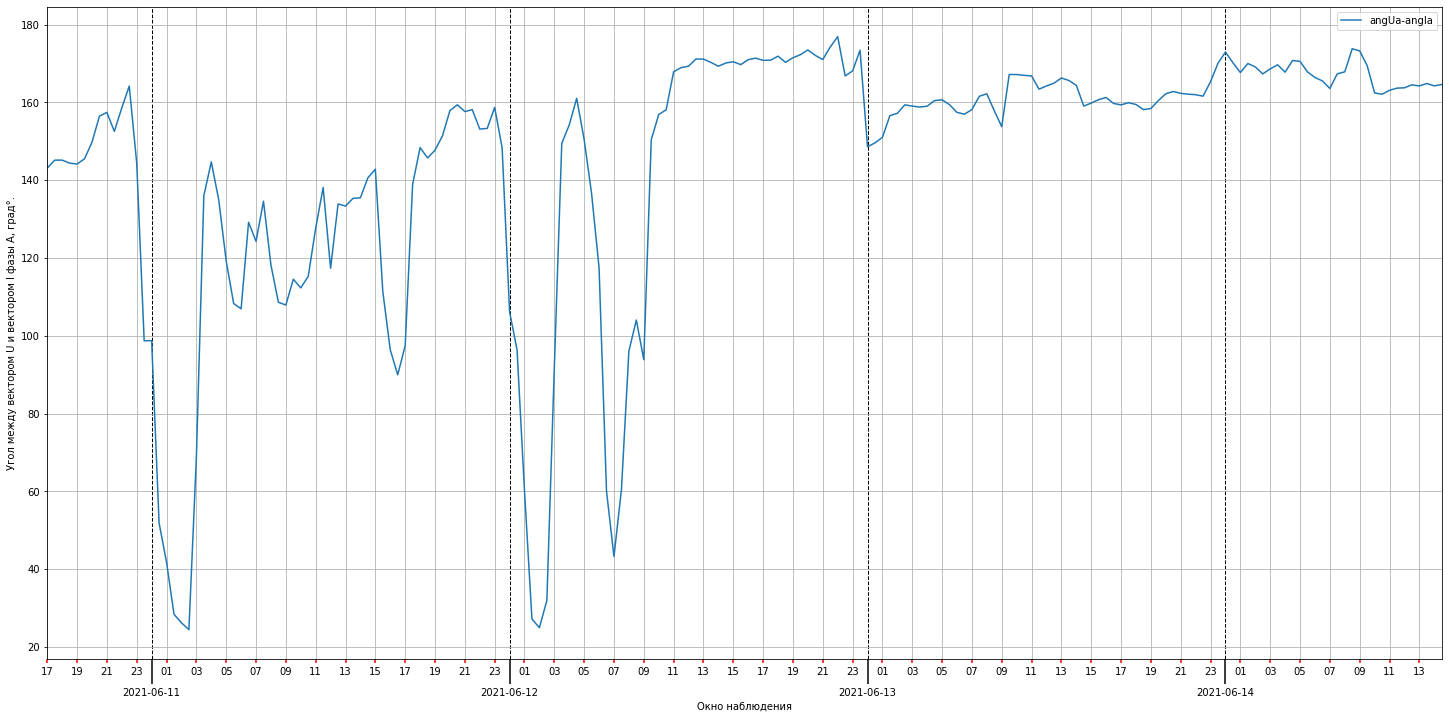

In [ ]:
import matplotlib.pyplot as plt 
import datetime as dt

#x = [dt.datetime.strptime(d,'%m/%d/%Y').date() for d in dates]
#y = range(len(x))

# Создаем  основу, которая будет содержать все элементы графика
fig = plt.figure(figsize=(25,12))
ax = fig.add_subplot(111)

#plt.title('Exponential function')
plt.plot(rpagk.index,
         rpagk['angUa-angIa'],
         label = 'angUa-angIa')

plt.xlabel('Окно наблюдения')
plt.ylabel('Угол между вектором U и вектором I фазы А, град°.')
plt.grid(which = 'both')
plt.legend()

# Grid settings
# ax.xaxis.grid(which="minor", color='k', linestyle='-.', linewidth=0.7)
ax.xaxis.grid(which="major", color='k', linestyle='--', linewidth=1)

# Limits of 'x' axis
datemin = np.datetime64('2021-06-10 16:59:52')
datemax = np.datetime64('2021-06-14 14:31:58')
ax.set_xlim(datemin, datemax)

# Major ticks every day.
fmt_day = mdates.DayLocator(interval=1)
ax.xaxis.set_major_locator(fmt_day)

# Minor ticks every hour.
fmt_hour = mdates.HourLocator(interval=2)
ax.xaxis.set_minor_locator(fmt_hour)

# Text of the minor 'x' ticks will be displayed in '%H' format.
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H'))

# Ticks params
ax.tick_params(axis = 'x', which='both', width=1.5)
ax.tick_params(axis = 'x', which='major', length=25, grid_linewidth = 1)
ax.tick_params(axis = 'x', which='minor', length=4, color='r')

plt.show()

In [ ]:
mask = pagk['angUa-angIa'] > 90
mask.sum()/pagk.shape[0]

0.9097312871870047